In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"

# Load Parquet file into a DataFrame
df = pd.read_parquet(file_path)

# Display the first few rows
print(df.head())


    Latitude  Longitude Observation_Date  Year  Region  \
0  19.343703 -96.464161       2017-10-01  2017  Mexico   
1  19.343703 -96.464161       2017-10-01  2017  Mexico   
2  19.343703 -96.464161       2017-10-01  2017  Mexico   
3  19.343703 -96.464161       2017-10-01  2017  Mexico   
4  19.343703 -96.464161       2017-10-01  2017  Mexico   

               Land_Cover_Description  Has_Habitat_Change  Temp_celsius  \
0  Cropland/Natural Vegetation Mosaic               False          27.0   
1  Cropland/Natural Vegetation Mosaic               False          27.0   
2  Cropland/Natural Vegetation Mosaic               False          27.0   
3  Cropland/Natural Vegetation Mosaic               False          27.0   
4  Cropland/Natural Vegetation Mosaic               False          27.0   

   Precip_mm  Month  
0      234.0     10  
1      234.0     10  
2      234.0     10  
3      234.0     10  
4      234.0     10  


In [ ]:
# Aggregate by Year, Month, Latitude, Longitude (count observations)
df_grouped = df.groupby(['Year', 'Month', 'Latitude', 'Longitude']).size().reset_index(name='Observation_Count')

# Display the first few rows
print("Aggregated Observation Counts:")
print(df_grouped.head())

# Show the summary of the grouped data
print(df_grouped.info())


Aggregated Observation Counts:
   Year  Month   Latitude  Longitude  Observation_Count
0  1974      1  25.286761 -80.898632                  1
1  1974      1  29.135411 -83.034037                  1
2  1974      1  32.501257 -93.809649                  1
3  1974      1  33.738571 -96.752751                  1
4  1974      1  34.615400 -93.184300                  2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044280 entries, 0 to 3044279
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int32  
 1   Month              int32  
 2   Latitude           float64
 3   Longitude          float64
 4   Observation_Count  int64  
dtypes: float64(2), int32(2), int64(1)
memory usage: 92.9 MB
None


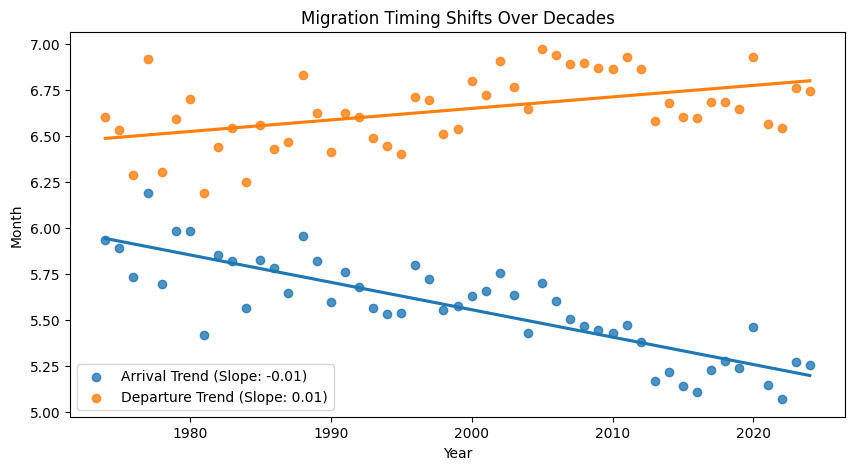

Arrival Trend: -0.0149 months/year
Departure Trend: 0.0063 months/year


In [ ]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

# Identify first and last sightings for each year at each location
arrival_dates = df_grouped.groupby(['Year', 'Latitude', 'Longitude'])['Month'].min().reset_index()
departure_dates = df_grouped.groupby(['Year', 'Latitude', 'Longitude'])['Month'].max().reset_index()

# Compute yearly averages for arrival and departure dates
arrival_trend = arrival_dates.groupby('Year')['Month'].mean().reset_index()
departure_trend = departure_dates.groupby('Year')['Month'].mean().reset_index()

# Fit linear trends
slope_arrival, intercept_arrival, *_ = linregress(arrival_trend['Year'], arrival_trend['Month'])
slope_departure, intercept_departure, *_ = linregress(departure_trend['Year'], departure_trend['Month'])

# Plot migration timing shifts
plt.figure(figsize=(10, 5))
sns.regplot(x=arrival_trend['Year'], y=arrival_trend['Month'], label=f'Arrival Trend (Slope: {slope_arrival:.2f})', ci=None)
sns.regplot(x=departure_trend['Year'], y=departure_trend['Month'], label=f'Departure Trend (Slope: {slope_departure:.2f})', ci=None)
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Migration Timing Shifts Over Decades")
plt.legend()
plt.show()

# Print slope results for interpretation
print(f"Arrival Trend: {slope_arrival:.4f} months/year")
print(f"Departure Trend: {slope_departure:.4f} months/year")


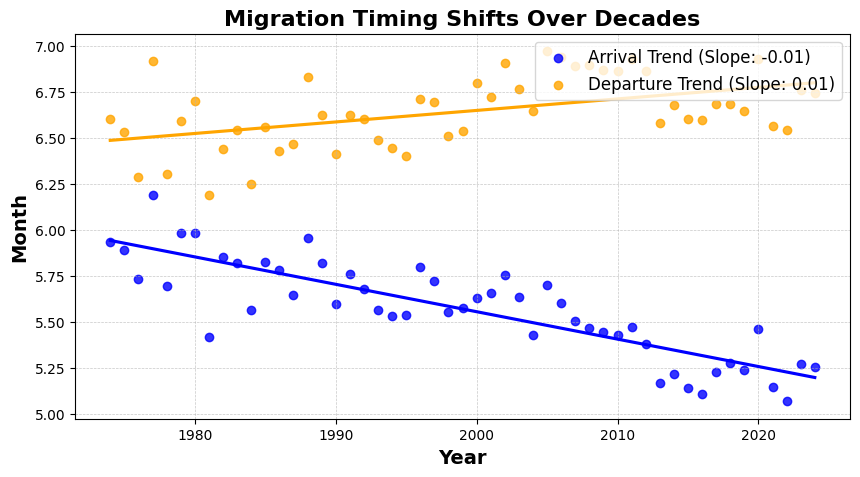

In [ ]:
# Plot migration timing shifts with enhanced readability
plt.figure(figsize=(10, 5))
sns.regplot(x=arrival_trend['Year'], y=arrival_trend['Month'], label=f'Arrival Trend (Slope: {slope_arrival:.2f})', ci=None, color="blue")
sns.regplot(x=departure_trend['Year'], y=departure_trend['Month'], label=f'Departure Trend (Slope: {slope_departure:.2f})', ci=None, color="orange")

# Titles and labels
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Month", fontsize=14, fontweight='bold')
plt.title("Migration Timing Shifts Over Decades", fontsize=16, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Move legend outside the plot
plt.legend(loc="upper right", fontsize=12, frameon=True)

# Show the improved plot
plt.show()


In [ ]:
!pip install pyarrow

In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"

# Load Parquet file using pyarrow explicitly
df = pd.read_parquet(file_path, engine='pyarrow')

# Display the first few rows
print(df.head())


    Latitude  Longitude Observation_Date  Year  Region  \
0  19.343703 -96.464161       2017-10-01  2017  Mexico   
1  19.343703 -96.464161       2017-10-01  2017  Mexico   
2  19.343703 -96.464161       2017-10-01  2017  Mexico   
3  19.343703 -96.464161       2017-10-01  2017  Mexico   
4  19.343703 -96.464161       2017-10-01  2017  Mexico   

               Land_Cover_Description  Has_Habitat_Change  Temp_celsius  \
0  Cropland/Natural Vegetation Mosaic               False          27.0   
1  Cropland/Natural Vegetation Mosaic               False          27.0   
2  Cropland/Natural Vegetation Mosaic               False          27.0   
3  Cropland/Natural Vegetation Mosaic               False          27.0   
4  Cropland/Natural Vegetation Mosaic               False          27.0   

   Precip_mm  Month  
0      234.0     10  
1      234.0     10  
2      234.0     10  
3      234.0     10  
4      234.0     10  


In [ ]:
!pip install fastparquet

df = pd.read_parquet(file_path, engine='fastparquet')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"

# Load Parquet file using fastparquet explicitly
df = pd.read_parquet(file_path, engine='fastparquet')

# Display the first few rows
print(df.head())


    Latitude  Longitude Observation_Date  Year  Region  \
0  19.343703 -96.464161       2017-10-01  2017  Mexico   
1  19.343703 -96.464161       2017-10-01  2017  Mexico   
2  19.343703 -96.464161       2017-10-01  2017  Mexico   
3  19.343703 -96.464161       2017-10-01  2017  Mexico   
4  19.343703 -96.464161       2017-10-01  2017  Mexico   

               Land_Cover_Description  Has_Habitat_Change  Temp_celsius  \
0  Cropland/Natural Vegetation Mosaic               False          27.0   
1  Cropland/Natural Vegetation Mosaic               False          27.0   
2  Cropland/Natural Vegetation Mosaic               False          27.0   
3  Cropland/Natural Vegetation Mosaic               False          27.0   
4  Cropland/Natural Vegetation Mosaic               False          27.0   

   Precip_mm  Month  
0      234.0     10  
1      234.0     10  
2      234.0     10  
3      234.0     10  
4      234.0     10  


In [ ]:
# Aggregate by Year, Month, Latitude, Longitude (count observations)
df_grouped = df.groupby(['Year', 'Month', 'Latitude', 'Longitude']).size().reset_index(name='Observation_Count')

# Display the first few rows
print("Aggregated Observation Counts:")
print(df_grouped.head())

# Show the summary of the grouped data
print(df_grouped.info())


Aggregated Observation Counts:
   Year  Month   Latitude  Longitude  Observation_Count
0  1974      1  25.286761 -80.898632                  1
1  1974      1  29.135411 -83.034037                  1
2  1974      1  32.501257 -93.809649                  1
3  1974      1  33.738571 -96.752751                  1
4  1974      1  34.615400 -93.184300                  2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044280 entries, 0 to 3044279
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int32  
 1   Month              int32  
 2   Latitude           float64
 3   Longitude          float64
 4   Observation_Count  int64  
dtypes: float64(2), int32(2), int64(1)
memory usage: 92.9 MB
None


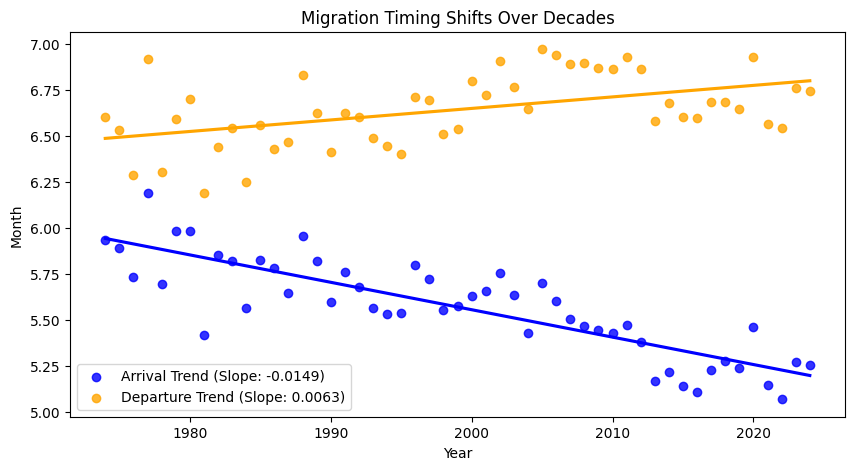

Arrival Trend: -0.0149 months/year
Departure Trend: 0.0063 months/year


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Identify first (arrival) and last (departure) sightings for each year at each location
arrival_dates = df_grouped.groupby(['Year', 'Latitude', 'Longitude'])['Month'].min().reset_index()
departure_dates = df_grouped.groupby(['Year', 'Latitude', 'Longitude'])['Month'].max().reset_index()

# Compute yearly averages
arrival_trend = arrival_dates.groupby('Year')['Month'].mean().reset_index()
departure_trend = departure_dates.groupby('Year')['Month'].mean().reset_index()

# Fit linear regression trend lines
slope_arrival, intercept_arrival, *_ = linregress(arrival_trend['Year'], arrival_trend['Month'])
slope_departure, intercept_departure, *_ = linregress(departure_trend['Year'], departure_trend['Month'])

# Plot trends
plt.figure(figsize=(10,5))
sns.regplot(x=arrival_trend['Year'], y=arrival_trend['Month'], label=f'Arrival Trend (Slope: {slope_arrival:.4f})', color='blue', ci=None)
sns.regplot(x=departure_trend['Year'], y=departure_trend['Month'], label=f'Departure Trend (Slope: {slope_departure:.4f})', color='orange', ci=None)
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Migration Timing Shifts Over Decades")
plt.legend()
plt.show()

# Print trend results
print(f"Arrival Trend: {slope_arrival:.4f} months/year")
print(f"Departure Trend: {slope_departure:.4f} months/year")


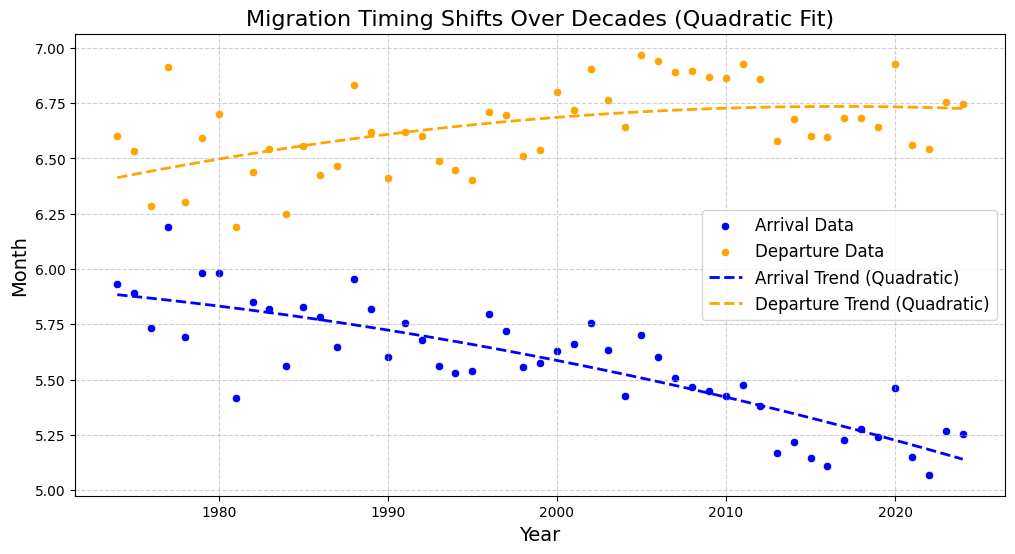

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Compute quadratic fit for arrival and departure trends
arrival_poly = np.polyfit(arrival_trend['Year'], arrival_trend['Month'], 2)
departure_poly = np.polyfit(departure_trend['Year'], departure_trend['Month'], 2)

# Generate years for smooth curve plotting
years = np.linspace(arrival_trend['Year'].min(), arrival_trend['Year'].max(), 100)

# Evaluate the polynomial fits
arrival_fit = np.polyval(arrival_poly, years)
departure_fit = np.polyval(departure_poly, years)

# Plot the trends
plt.figure(figsize=(12,6))
sns.scatterplot(x=arrival_trend['Year'], y=arrival_trend['Month'], color='blue', label="Arrival Data")
sns.scatterplot(x=departure_trend['Year'], y=departure_trend['Month'], color='orange', label="Departure Data")

# Plot the polynomial fit lines
plt.plot(years, arrival_fit, color='blue', linestyle='dashed', linewidth=2, label="Arrival Trend (Quadratic)")
plt.plot(years, departure_fit, color='orange', linestyle='dashed', linewidth=2, label="Departure Trend (Quadratic)")

# Labels and formatting
plt.xlabel("Year", fontsize=14)
plt.ylabel("Month", fontsize=14)
plt.title("Migration Timing Shifts Over Decades (Quadratic Fit)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [ ]:
# Identify first and last sightings for each year at each location
arrival_dates = df_grouped.groupby(['Year', 'Latitude', 'Longitude'])['Month'].min().reset_index()
departure_dates = df_grouped.groupby(['Year', 'Latitude', 'Longitude'])['Month'].max().reset_index()


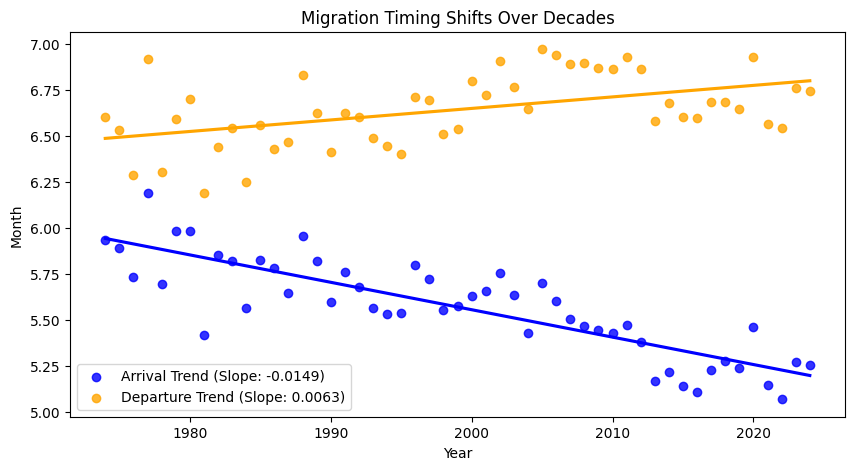

Arrival Trend: -0.0149 months/year
Departure Trend: 0.0063 months/year


In [ ]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

# Compute yearly averages
arrival_trend = arrival_dates.groupby('Year')['Month'].mean().reset_index()
departure_trend = departure_dates.groupby('Year')['Month'].mean().reset_index()

# Fit linear trend
slope_arrival, intercept_arrival, *_ = linregress(arrival_trend['Year'], arrival_trend['Month'])
slope_departure, intercept_departure, *_ = linregress(departure_trend['Year'], departure_trend['Month'])

# Plot trends
plt.figure(figsize=(10,5))
sns.regplot(x=arrival_trend['Year'], y=arrival_trend['Month'], label=f'Arrival Trend (Slope: {slope_arrival:.4f})', ci=None, color="blue")
sns.regplot(x=departure_trend['Year'], y=departure_trend['Month'], label=f'Departure Trend (Slope: {slope_departure:.4f})', ci=None, color="orange")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Migration Timing Shifts Over Decades")
plt.legend()
plt.show()

print(f"Arrival Trend: {slope_arrival:.4f} months/year")
print(f"Departure Trend: {slope_departure:.4f} months/year")


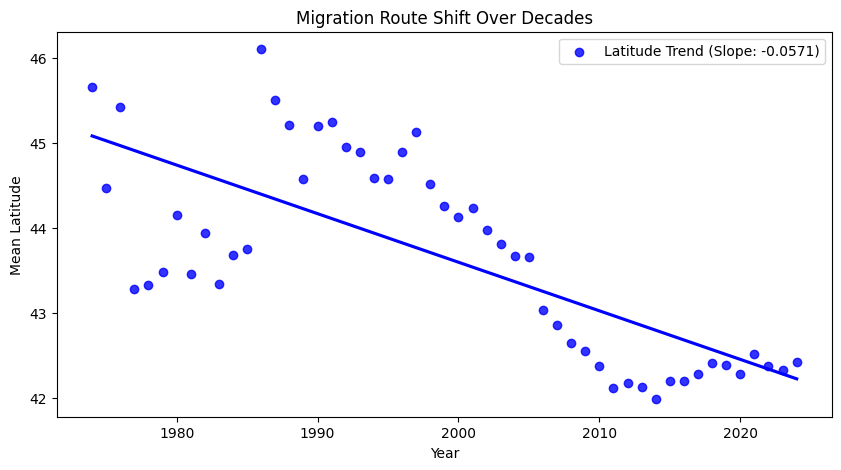

In [ ]:
# Compute weighted mean latitude per year
df_grouped['Weighted_Latitude'] = df_grouped['Latitude'] * df_grouped['Observation_Count']
lat_trend = df_grouped.groupby('Year').agg({'Weighted_Latitude': 'sum', 'Observation_Count': 'sum'}).reset_index()
lat_trend['Mean_Latitude'] = lat_trend['Weighted_Latitude'] / lat_trend['Observation_Count']

# Fit linear trend
slope_lat, intercept_lat, *_ = linregress(lat_trend['Year'], lat_trend['Mean_Latitude'])

# Plot trend
plt.figure(figsize=(10,5))
sns.regplot(x=lat_trend['Year'], y=lat_trend['Mean_Latitude'], label=f'Latitude Trend (Slope: {slope_lat:.4f})', ci=None, color="blue")
plt.xlabel("Year")
plt.ylabel("Mean Latitude")
plt.title("Migration Route Shift Over Decades")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Compute yearly average temperature and precipitation
climate_trend = df.groupby('Year')[['Temp_celsius', 'Precip_mm']].mean().reset_index()

# Correlate temperature with arrival timing
corr_temp, p_temp = pearsonr(climate_trend['Temp_celsius'], arrival_trend['Month'])
corr_prec, p_prec = pearsonr(climate_trend['Precip_mm'], arrival_trend['Month'])

print(f"Correlation between Temperature and Arrival Date: {corr_temp:.2f} (p={p_temp:.3f})")
print(f"Correlation between Precipitation and Arrival Date: {corr_prec:.2f} (p={p_prec:.3f})")


Correlation between Temperature and Arrival Date: -0.54 (p=0.000)
Correlation between Precipitation and Arrival Date: 0.38 (p=0.006)


In [ ]:
import geopandas as gpd

# Corrected Google Drive Path
file_path = "/content/drive/MyDrive/Colab Notebooks/Updated Milestone 2/ne_110m_admin_0_countries.shp"

# Load the world map
world = gpd.read_file(file_path)

# Display first few rows to confirm it's working
print(world.head())


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

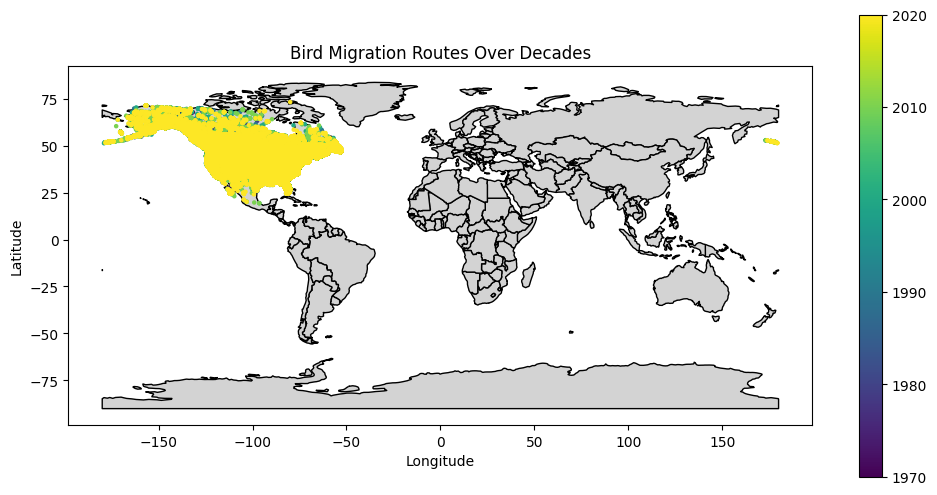

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert dataframe to GeoDataFrame
gdf = gpd.GeoDataFrame(df_grouped, geometry=gpd.points_from_xy(df_grouped.Longitude, df_grouped.Latitude))

# Plot migration routes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Color points by decade
gdf['Decade'] = (gdf['Year'] // 10) * 10  # Convert year to decade
gdf.plot(column='Decade', ax=ax, legend=True, markersize=5, cmap='viridis')

plt.title("Bird Migration Routes Over Decades")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Compute yearly average temperature and precipitation
climate_trend = df.groupby('Year')[['Temp_celsius', 'Precip_mm']].mean().reset_index()

# Correlate temperature with arrival timing
corr_temp, p_temp = pearsonr(climate_trend['Temp_celsius'], arrival_trend['Month'])
corr_prec, p_prec = pearsonr(climate_trend['Precip_mm'], arrival_trend['Month'])

print(f"Correlation between Temperature and Arrival Date: {corr_temp:.2f} (p={p_temp:.3f})")
print(f"Correlation between Precipitation and Arrival Date: {corr_prec:.2f} (p={p_prec:.3f})")

# Correlate departure timing with climate
corr_temp_dep, p_temp_dep = pearsonr(climate_trend['Temp_celsius'], departure_trend['Month'])
corr_prec_dep, p_prec_dep = pearsonr(climate_trend['Precip_mm'], departure_trend['Month'])

print(f"Correlation between Temperature and Departure Date: {corr_temp_dep:.2f} (p={p_temp_dep:.3f})")
print(f"Correlation between Precipitation and Departure Date: {corr_prec_dep:.2f} (p={p_prec_dep:.3f})")


Correlation between Temperature and Arrival Date: -0.54 (p=0.000)
Correlation between Precipitation and Arrival Date: 0.38 (p=0.006)
Correlation between Temperature and Departure Date: 0.51 (p=0.000)
Correlation between Precipitation and Departure Date: -0.25 (p=0.082)


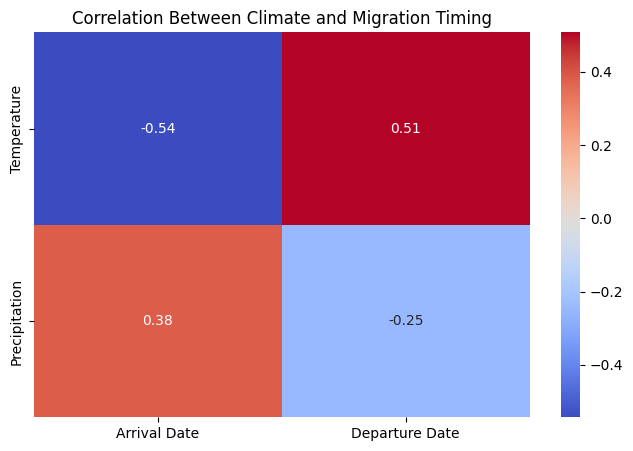

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine into a DataFrame
corr_data = {
    'Arrival Date': [corr_temp, corr_prec],
    'Departure Date': [corr_temp_dep, corr_prec_dep]
}
corr_df = pd.DataFrame(corr_data, index=['Temperature', 'Precipitation'])

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Climate and Migration Timing")
plt.show()


In [ ]:
!pip install pyarrow fastparquet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00


In [ ]:
!pip install pyarrow fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the correct file path
file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"

# Load the Parquet file
df = pd.read_parquet(file_path)

# Display first few rows
print(df.head())

# Check if dataset loaded properly
print(df.info())


    Latitude  Longitude Observation_Date  Year  Region  \
0  19.343703 -96.464161       2017-10-01  2017  Mexico   
1  19.343703 -96.464161       2017-10-01  2017  Mexico   
2  19.343703 -96.464161       2017-10-01  2017  Mexico   
3  19.343703 -96.464161       2017-10-01  2017  Mexico   
4  19.343703 -96.464161       2017-10-01  2017  Mexico   

               Land_Cover_Description  Has_Habitat_Change  Temp_celsius  \
0  Cropland/Natural Vegetation Mosaic               False          27.0   
1  Cropland/Natural Vegetation Mosaic               False          27.0   
2  Cropland/Natural Vegetation Mosaic               False          27.0   
3  Cropland/Natural Vegetation Mosaic               False          27.0   
4  Cropland/Natural Vegetation Mosaic               False          27.0   

   Precip_mm  Month  
0      234.0     10  
1      234.0     10  
2      234.0     10  
3      234.0     10  
4      234.0     10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7498836 entries, 0

In [ ]:
import os
print(os.listdir("/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/"))


['New Temporal Analysis.ipynb', 'ne_110m_admin_0_countries.cpg', 'ne_110m_admin_0_countries.README.html', 'ne_110m_admin_0_countries.dbf', 'ne_110m_admin_0_countries.prj', 'ne_110m_admin_0_countries.shp', 'ne_110m_admin_0_countries.VERSION.txt', 'ne_110m_admin_0_countries.shx', 'final_merged_dataset.parquet']


In [ ]:
!pip install pyarrow fastparquet


In [ ]:
# Define migration periods based on months
def categorize_migration_season(month):
    if month in [8, 9, 10, 11, 12, 1]:
        return "Fall Migration (Southward)"
    elif month in [2, 3, 4, 5]:
        return "Spring Migration (Northward)"
    else:
        return "Resident/Non-Migratory"

# Apply to dataset
df["Migration_Season"] = df["Month"].apply(categorize_migration_season)

# Check results
print(df[["Month", "Migration_Season"]].drop_duplicates())


     Month              Migration_Season
0       10    Fall Migration (Southward)
6       11    Fall Migration (Southward)
9        1    Fall Migration (Southward)
11       4  Spring Migration (Northward)
18       3  Spring Migration (Northward)
28       2  Spring Migration (Northward)
30      12    Fall Migration (Southward)
36       9    Fall Migration (Southward)
37       6        Resident/Non-Migratory
40       5  Spring Migration (Northward)
93       7        Resident/Non-Migratory
519      8    Fall Migration (Southward)


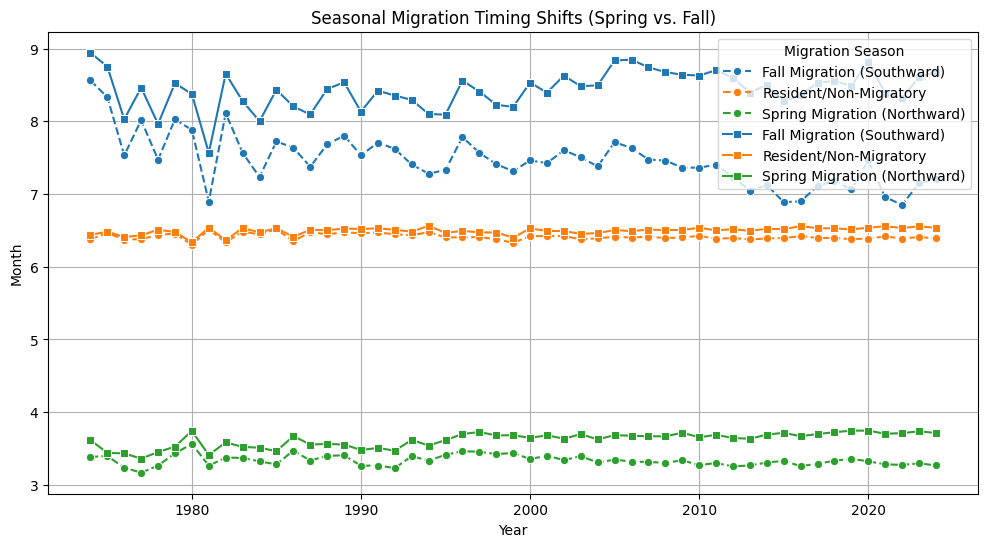

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Seasonal Migration Shifts (Corrected)
plt.figure(figsize=(12, 6))

# Plot arrival trend
sns.lineplot(data=arrival_trend, x="Year", y="Month", hue="Migration_Season", marker="o", linestyle="--")

# Plot departure trend
sns.lineplot(data=departure_trend, x="Year", y="Month", hue="Migration_Season", marker="s", linestyle="-")

plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Seasonal Migration Timing Shifts (Spring vs. Fall)")
plt.legend(title="Migration Season")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"
df = pd.read_parquet(file_path)

# Preview data
print(df.head())


    Latitude  Longitude Observation_Date  Year  Region  \
0  19.343703 -96.464161       2017-10-01  2017  Mexico   
1  19.343703 -96.464161       2017-10-01  2017  Mexico   
2  19.343703 -96.464161       2017-10-01  2017  Mexico   
3  19.343703 -96.464161       2017-10-01  2017  Mexico   
4  19.343703 -96.464161       2017-10-01  2017  Mexico   

               Land_Cover_Description  Has_Habitat_Change  Temp_celsius  \
0  Cropland/Natural Vegetation Mosaic               False          27.0   
1  Cropland/Natural Vegetation Mosaic               False          27.0   
2  Cropland/Natural Vegetation Mosaic               False          27.0   
3  Cropland/Natural Vegetation Mosaic               False          27.0   
4  Cropland/Natural Vegetation Mosaic               False          27.0   

   Precip_mm  Month  
0      234.0     10  
1      234.0     10  
2      234.0     10  
3      234.0     10  
4      234.0     10  


In [ ]:
# Aggregate Observation Counts
df_grouped = df.groupby(['Year', 'Month', 'Latitude', 'Longitude']).size().reset_index(name='Observation_Count')

# Preview grouped data
print(df_grouped.head())


   Year  Month   Latitude  Longitude  Observation_Count
0  1974      1  25.286761 -80.898632                  1
1  1974      1  29.135411 -83.034037                  1
2  1974      1  32.501257 -93.809649                  1
3  1974      1  33.738571 -96.752751                  1
4  1974      1  34.615400 -93.184300                  2


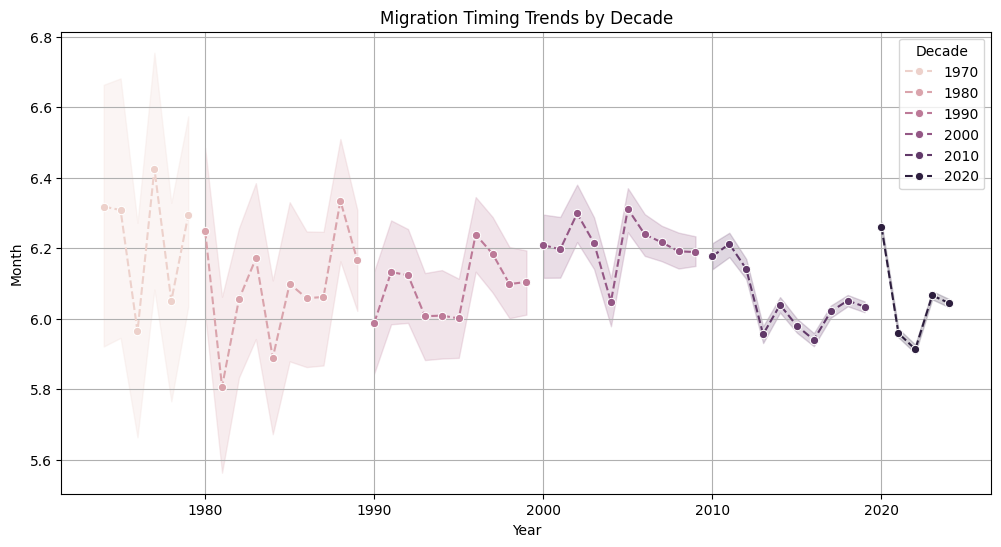

In [ ]:
df_grouped['Decade'] = (df_grouped['Year'] // 10) * 10


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="Year", y="Month", hue="Decade", marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Migration Timing Trends by Decade")
plt.legend(title="Decade")
plt.grid(True)
plt.show()


<ipython-input-15-a1d52de1b0bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_df, x="Decade", y="Slope", palette="magma")


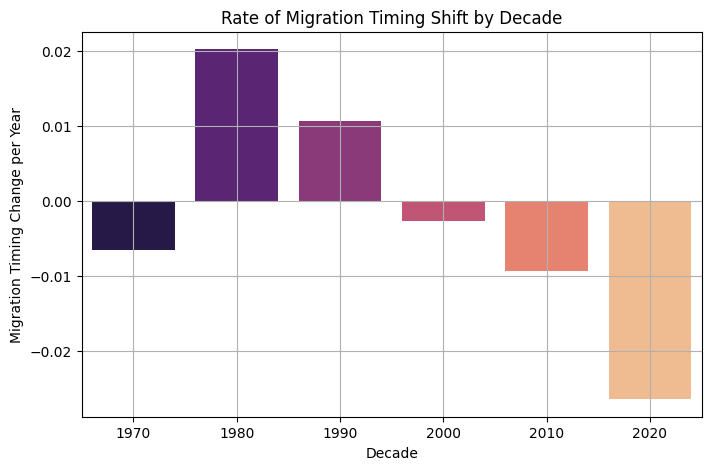

In [ ]:
from scipy.stats import linregress

decades = df_grouped['Decade'].unique()
trend_data = []

for decade in decades:
    subset = df_grouped[df_grouped['Decade'] == decade]
    slope, intercept, *_ = linregress(subset['Year'], subset['Month'])
    trend_data.append((decade, slope))


trend_df = pd.DataFrame(trend_data, columns=["Decade", "Slope"])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=trend_df, x="Decade", y="Slope", palette="magma")
plt.xlabel("Decade")
plt.ylabel("Migration Timing Change per Year")
plt.title("Rate of Migration Timing Shift by Decade")
plt.grid(True)
plt.show()


In [ ]:
print(df_grouped.columns)


Index(['Year', 'Month', 'Latitude', 'Longitude', 'Observation_Count',
       'Decade'],
      dtype='object')


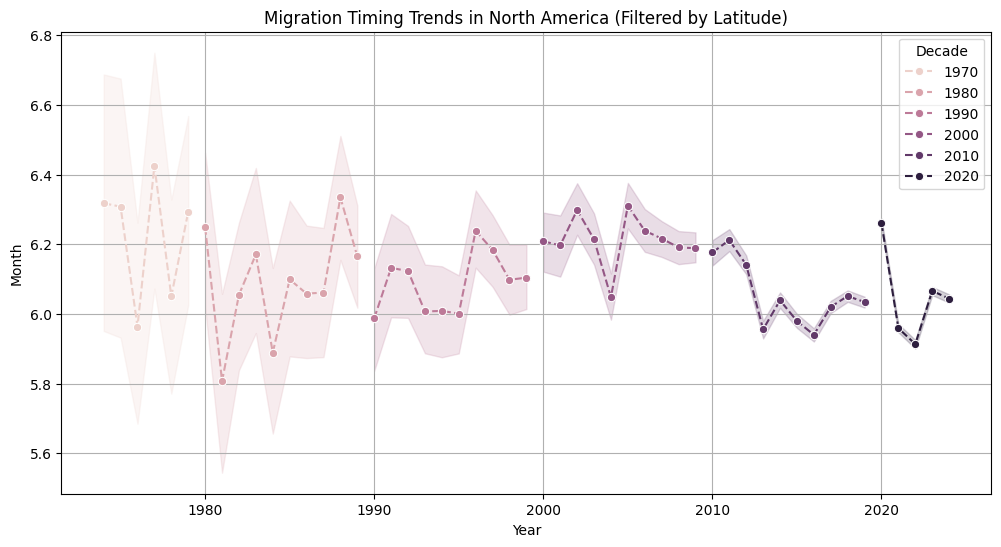

In [ ]:
# Filter only North America (Latitudes between 15°N and 70°N)
df_north_america = df_grouped[(df_grouped["Latitude"] >= 15) & (df_grouped["Latitude"] <= 70)]

# Plot Migration Trends for North America
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_north_america, x="Year", y="Month", hue="Decade", marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Migration Timing Trends in North America (Filtered by Latitude)")
plt.legend(title="Decade")
plt.grid(True)
plt.show()


<ipython-input-19-61431f06dd6e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north_america["Migration_Season"] = df_north_america["Month"].apply(classify_migration_season)


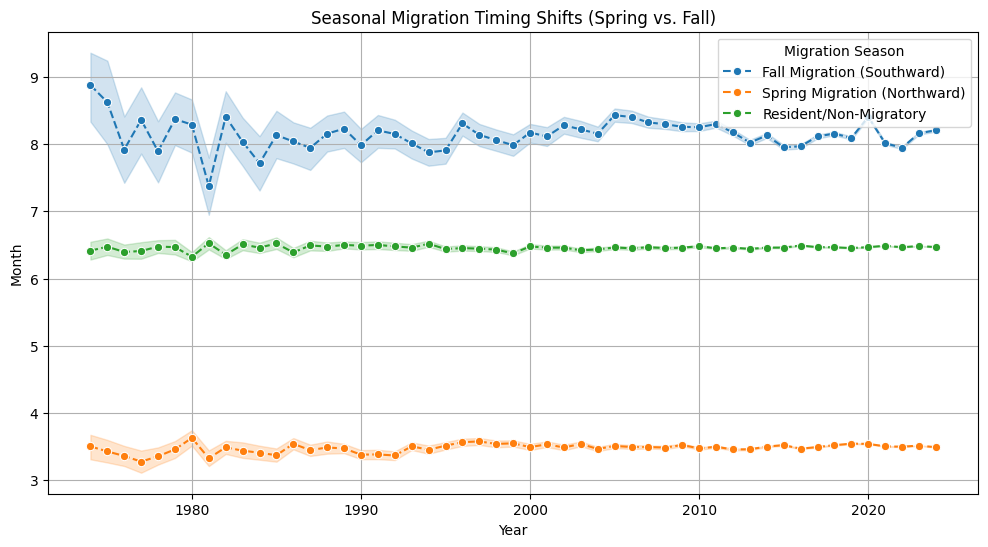

In [ ]:
def classify_migration_season(month):
    if month in [8, 9, 10, 11, 12, 1]:
        return "Fall Migration (Southward)"
    elif month in [2, 3, 4, 5]:
        return "Spring Migration (Northward)"
    else:
        return "Resident/Non-Migratory"


df_north_america["Migration_Season"] = df_north_america["Month"].apply(classify_migration_season)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_north_america, x="Year", y="Month", hue="Migration_Season", marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Seasonal Migration Timing Shifts (Spring vs. Fall)")
plt.legend(title="Migration Season")
plt.grid(True)
plt.show()


<ipython-input-20-1bd77378e735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north_america["Time_Period"] = pd.cut(df_north_america["Year"], bins=[1970, 1990, 2010, 2030],


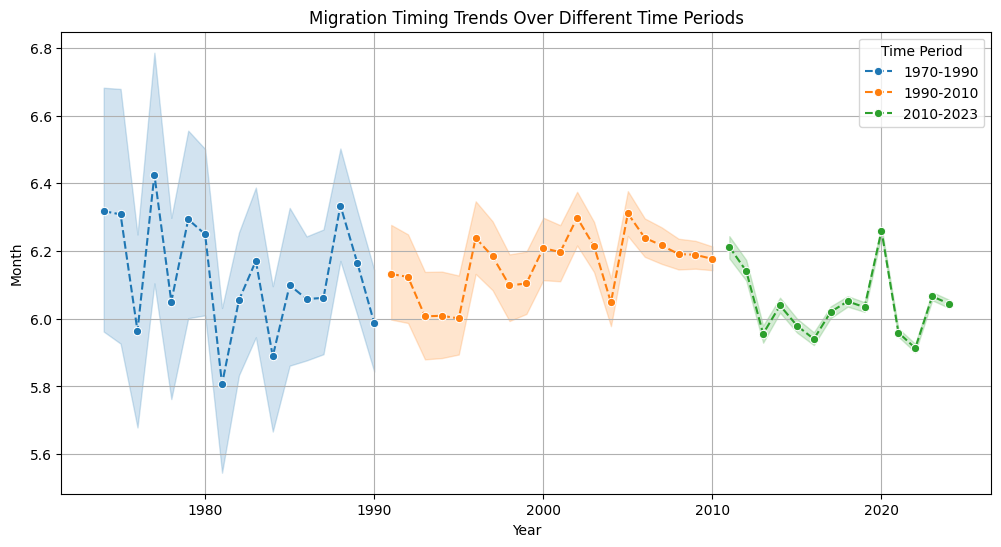

In [ ]:
df_north_america["Time_Period"] = pd.cut(df_north_america["Year"], bins=[1970, 1990, 2010, 2030],
                                         labels=["1970-1990", "1990-2010", "2010-2023"])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_north_america, x="Year", y="Month", hue="Time_Period", marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Migration Timing Trends Over Different Time Periods")
plt.legend(title="Time Period")
plt.grid(True)
plt.show()


<ipython-input-21-f4af9210f024>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north_america["Geographic_Region"] = df_north_america["Latitude"].apply(classify_region)


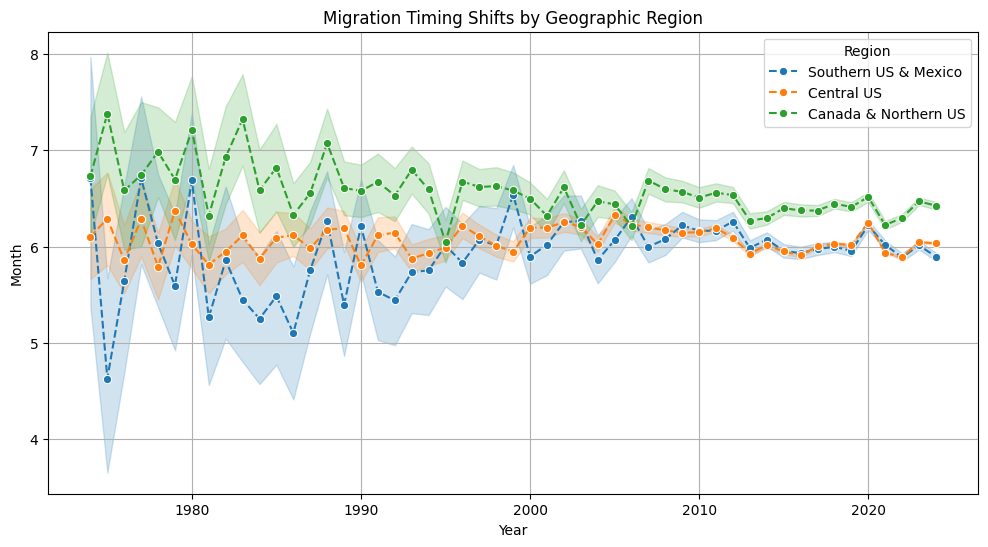

In [ ]:
# Categorize Locations (Example: Rough Latitude Ranges)
def classify_region(lat):
    if lat >= 50:
        return "Canada & Northern US"
    elif 35 <= lat < 50:
        return "Central US"
    else:
        return "Southern US & Mexico"

# Apply the Region Classification
df_north_america["Geographic_Region"] = df_north_america["Latitude"].apply(classify_region)

# Plot Migration Timing by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_north_america, x="Year", y="Month", hue="Geographic_Region", marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Migration Timing Shifts by Geographic Region")
plt.legend(title="Region")
plt.grid(True)
plt.show()


In [ ]:
print(df_grouped.head())


   Year  Month   Latitude  Longitude  Observation_Count  Decade
0  1974      1  25.286761 -80.898632                  1    1970
1  1974      1  29.135411 -83.034037                  1    1970
2  1974      1  32.501257 -93.809649                  1    1970
3  1974      1  33.738571 -96.752751                  1    1970
4  1974      1  34.615400 -93.184300                  2    1970


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"
df = pd.read_parquet(file_path)

# Aggregate observations by location and time
df_grouped = df.groupby(['Year', 'Month', 'Latitude', 'Longitude']).size().reset_index(name='Observation_Count')


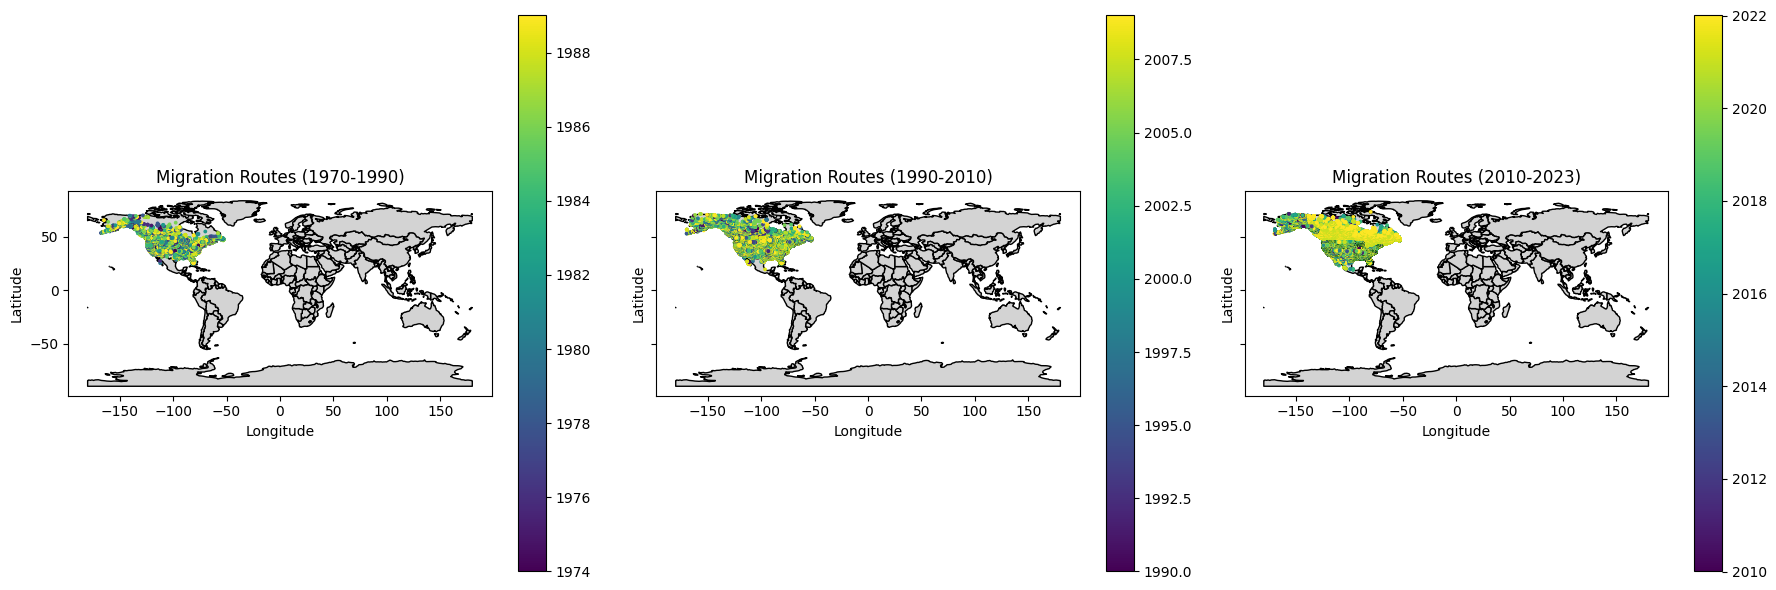

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Data
file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"
df = pd.read_parquet(file_path)

# Filter for North America (Latitude > 15, Longitude between -170 and -50)
df_na = df.loc[(df["Latitude"] > 15) & (df["Longitude"].between(-170, -50))].copy()

# Assign Decades for Comparison (Fixing the warning)
df_na.loc[:, "Decade"] = (df_na["Year"] // 10) * 10

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_na, geometry=gpd.points_from_xy(df_na.Longitude, df_na.Latitude))

# Load World Map from downloaded shapefile (replace with actual path)
world = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/ne_110m_admin_0_countries.shp")

# Define Time Periods for Separate Views
time_periods = [(1970, 1990), (1990, 2010), (2010, 2023)]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, (start, end) in zip(axes, time_periods):
    subset = gdf[(gdf["Year"] >= start) & (gdf["Year"] < end)]

    world.plot(ax=ax, color="lightgrey", edgecolor="black")  # Plot world map
    subset.plot(column="Year", ax=ax, legend=True, cmap="viridis", markersize=3)  # Plot migration data

    ax.set_title(f"Migration Routes ({start}-{end})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


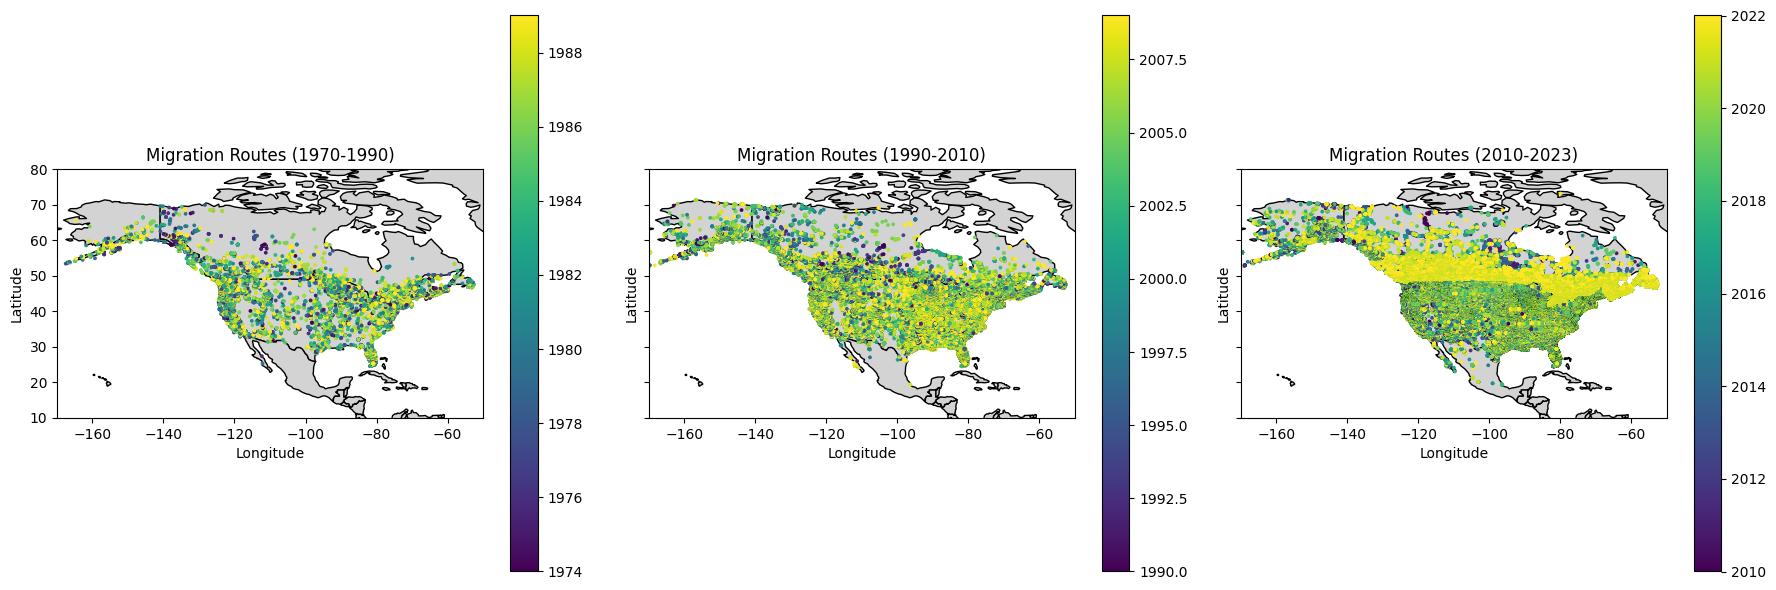

In [ ]:
# Define Time Periods for Separate Views
time_periods = [(1970, 1990), (1990, 2010), (2010, 2023)]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, (start, end) in zip(axes, time_periods):
    subset = gdf[(gdf["Year"] >= start) & (gdf["Year"] < end)]

    world.plot(ax=ax, color="lightgrey", edgecolor="black")  # Plot world map
    subset.plot(column="Year", ax=ax, legend=True, cmap="viridis", markersize=3)  # Plot migration data

    ax.set_title(f"Migration Routes ({start}-{end})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Set focus to North America (adjust as needed)
    ax.set_xlim(-170, -50)  # Focus on North America (West to East)
    ax.set_ylim(10, 80)      # Focus on North America (South to North)

plt.tight_layout()
plt.show()


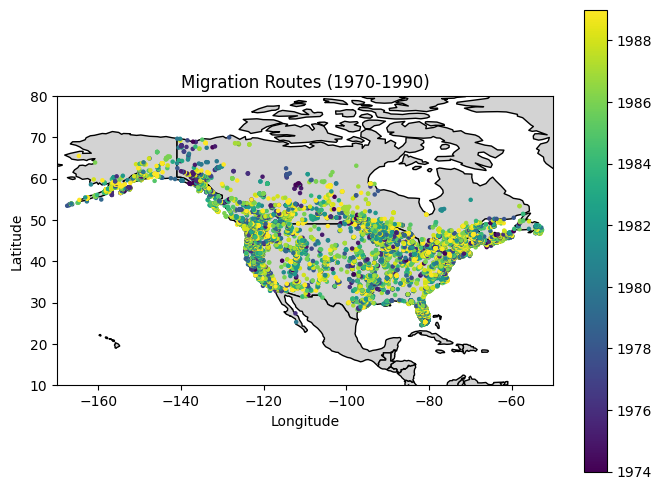

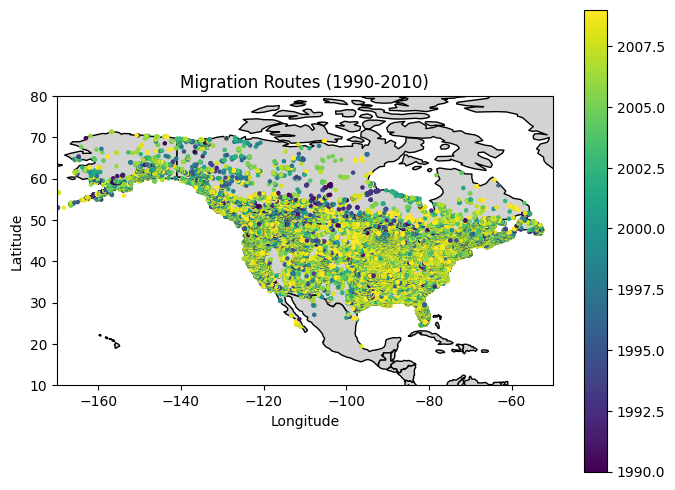

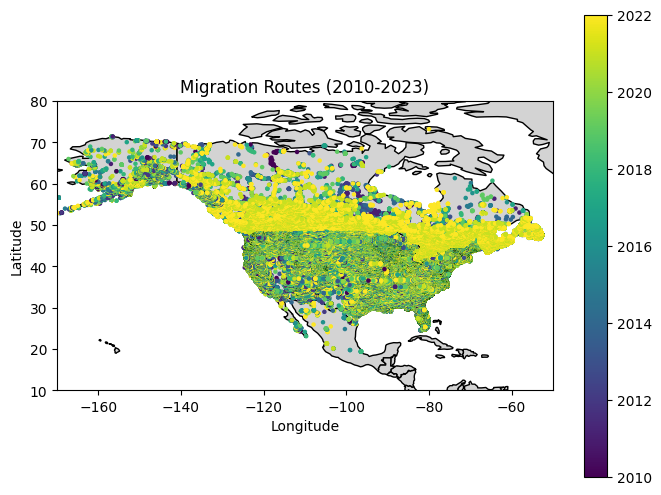

In [ ]:
# Define Time Periods for Separate Views
time_periods = [(1970, 1990), (1990, 2010), (2010, 2023)]

for start, end in time_periods:
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size

    subset = gdf[(gdf["Year"] >= start) & (gdf["Year"] < end)]

    world.plot(ax=ax, color="lightgrey", edgecolor="black")  # Plot world map
    subset.plot(column="Year", ax=ax, legend=True, cmap="viridis", markersize=5)  # Plot migration data

    ax.set_title(f"Migration Routes ({start}-{end})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Zoom into North America
    ax.set_xlim(-170, -50)
    ax.set_ylim(10, 80)

    plt.show()


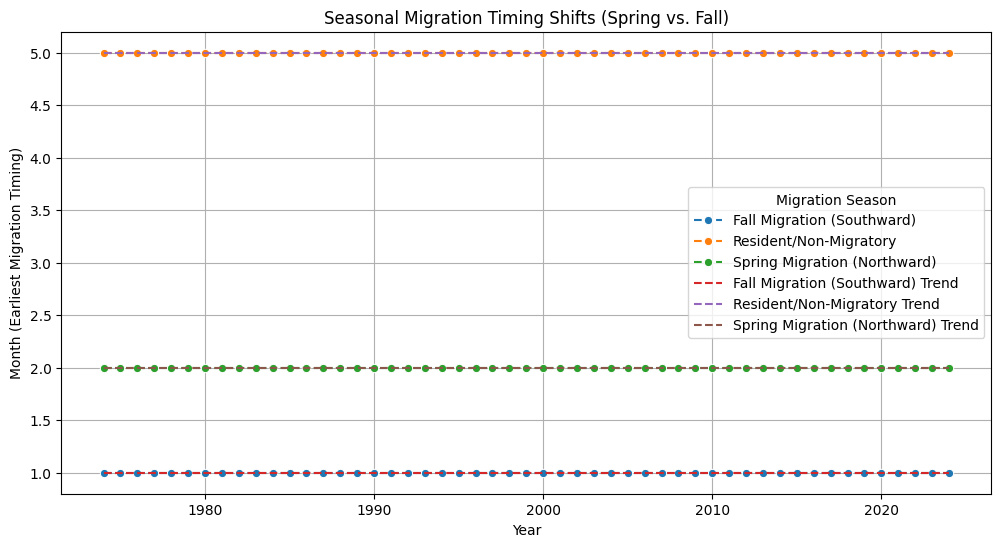

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Use the earliest arrival for more accurate trends
df_trend = df_grouped.groupby(['Year', 'Migration_Season'])['Month'].min().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x="Year", y="Month", hue="Migration_Season", marker="o", linestyle="--")

# Add trendlines for each season
for season in df_trend["Migration_Season"].unique():
    subset = df_trend[df_trend["Migration_Season"] == season]
    if len(subset) > 1:
        slope, intercept, _, _, _ = linregress(subset["Year"], subset["Month"])
        plt.plot(subset["Year"], intercept + slope * subset["Year"], linestyle='dashed', label=f"{season} Trend")

plt.title("Seasonal Migration Timing Shifts (Spring vs. Fall)")
plt.xlabel("Year")
plt.ylabel("Month (Earliest Migration Timing)")
plt.legend(title="Migration Season")
plt.grid(True)
plt.show()


In [ ]:
print(df_grouped[['Year', 'Month', 'Migration_Season']].drop_duplicates().sort_values(['Year', 'Migration_Season']).head(20))


    Year  Month              Migration_Season
0   1974      1    Fall Migration (Southward)
7   1974      8    Fall Migration (Southward)
8   1974      9    Fall Migration (Southward)
9   1974     10    Fall Migration (Southward)
10  1974     11    Fall Migration (Southward)
11  1974     12    Fall Migration (Southward)
4   1974      5        Resident/Non-Migratory
5   1974      6        Resident/Non-Migratory
6   1974      7        Resident/Non-Migratory
1   1974      2  Spring Migration (Northward)
2   1974      3  Spring Migration (Northward)
3   1974      4  Spring Migration (Northward)
12  1975      1    Fall Migration (Southward)
19  1975      8    Fall Migration (Southward)
20  1975      9    Fall Migration (Southward)
21  1975     10    Fall Migration (Southward)
22  1975     11    Fall Migration (Southward)
23  1975     12    Fall Migration (Southward)
16  1975      5        Resident/Non-Migratory
17  1975      6        Resident/Non-Migratory


In [ ]:
print(df_grouped[['Month', 'Migration_Season']].drop_duplicates().sort_values('Month'))


    Month              Migration_Season
0       1    Fall Migration (Southward)
1       2  Spring Migration (Northward)
2       3  Spring Migration (Northward)
3       4  Spring Migration (Northward)
4       5        Resident/Non-Migratory
5       6        Resident/Non-Migratory
6       7        Resident/Non-Migratory
7       8    Fall Migration (Southward)
8       9    Fall Migration (Southward)
9      10    Fall Migration (Southward)
10     11    Fall Migration (Southward)
11     12    Fall Migration (Southward)


In [ ]:
def classify_migration_season(month):
    if month in [8, 9, 10, 11, 12, 1]:  # Adjusted to include slight shifts
        return "Fall Migration (Southward)"
    elif month in [2, 3, 4, 5]:  # Includes possible late spring migrations
        return "Spring Migration (Northward)"
    else:
        return "Resident/Non-Migratory"

df_grouped['Migration_Season'] = df_grouped['Month'].apply(classify_migration_season)


In [ ]:
print(df_grouped[['Year', 'Month', 'Migration_Season']].drop_duplicates().sort_values(['Year', 'Migration_Season']).head(20))
print(df_grouped[['Month', 'Migration_Season']].drop_duplicates().sort_values('Month'))


    Year  Month              Migration_Season
0   1974      1    Fall Migration (Southward)
7   1974      8    Fall Migration (Southward)
8   1974      9    Fall Migration (Southward)
9   1974     10    Fall Migration (Southward)
10  1974     11    Fall Migration (Southward)
11  1974     12    Fall Migration (Southward)
5   1974      6        Resident/Non-Migratory
6   1974      7        Resident/Non-Migratory
1   1974      2  Spring Migration (Northward)
2   1974      3  Spring Migration (Northward)
3   1974      4  Spring Migration (Northward)
4   1974      5  Spring Migration (Northward)
12  1975      1    Fall Migration (Southward)
19  1975      8    Fall Migration (Southward)
20  1975      9    Fall Migration (Southward)
21  1975     10    Fall Migration (Southward)
22  1975     11    Fall Migration (Southward)
23  1975     12    Fall Migration (Southward)
17  1975      6        Resident/Non-Migratory
18  1975      7        Resident/Non-Migratory
    Month              Migration_S

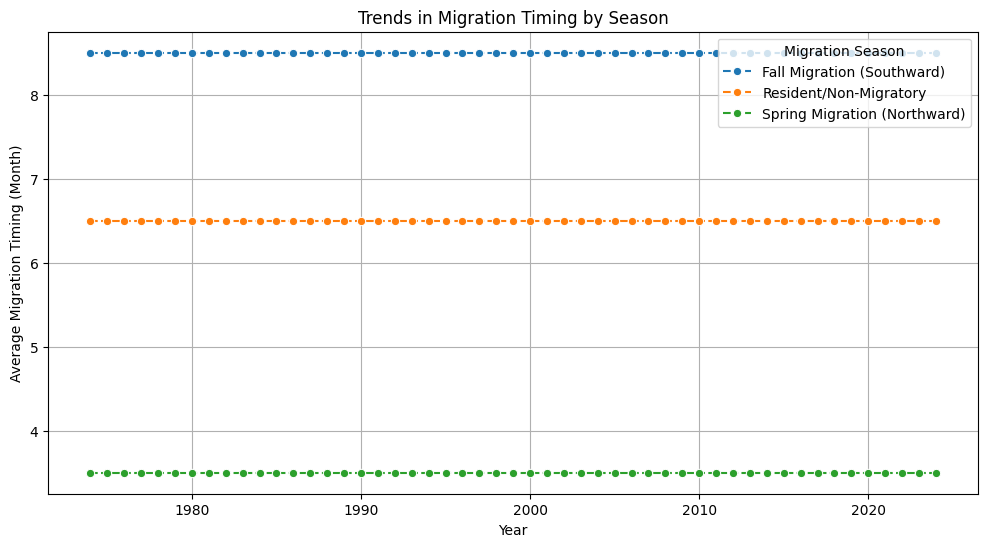

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and Migration Season to get average migration timing
seasonal_trends = df_grouped.groupby(['Year', 'Migration_Season'])['Month'].mean().reset_index()

# Plot the migration timing trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='Year', y='Month', hue='Migration_Season', marker='o', linestyle="--")

plt.xlabel("Year")
plt.ylabel("Average Migration Timing (Month)")
plt.title("Trends in Migration Timing by Season")
plt.legend(title="Migration Season")
plt.grid(True)
plt.show()


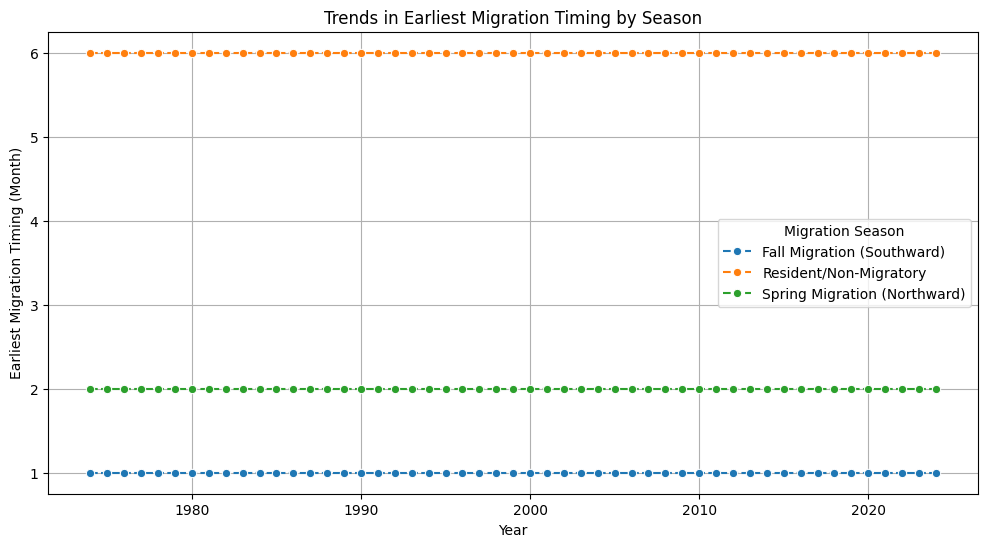

In [ ]:
# Find the earliest recorded migration timing per season each year
earliest_trends = df_grouped.groupby(['Year', 'Migration_Season'])['Month'].min().reset_index()

# Plot the earliest migration timing trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=earliest_trends, x='Year', y='Month', hue='Migration_Season', marker='o', linestyle="--")

plt.xlabel("Year")
plt.ylabel("Earliest Migration Timing (Month)")
plt.title("Trends in Earliest Migration Timing by Season")
plt.legend(title="Migration Season")
plt.grid(True)
plt.show()


<ipython-input-41-8960a7f35d5f>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope = df_grouped.groupby(['Migration_Season', (df_grouped['Year'] // 10) * 10]).apply(compute_slope).reset_index()


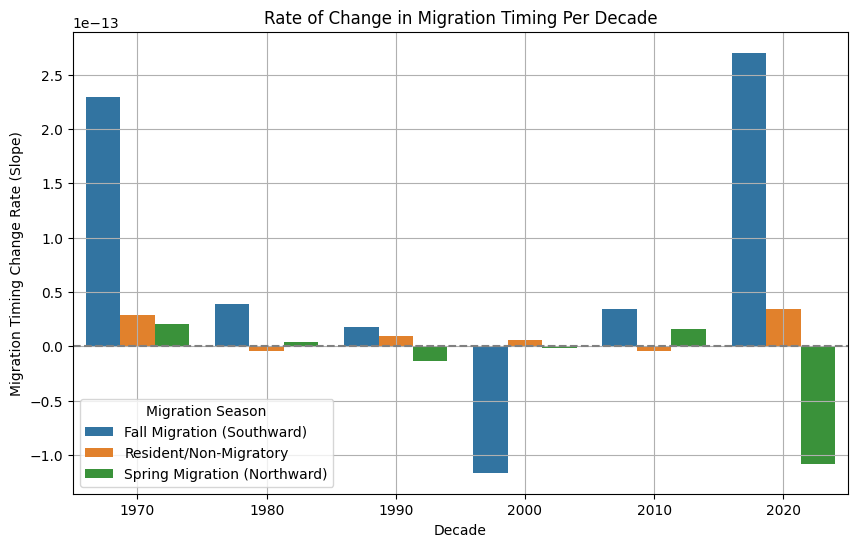

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute linear regression slopes per season
def compute_slope(data):
    slope, intercept = np.polyfit(data['Year'], data['Month'], 1)
    return slope

# Group data by decade and migration season
df_slope = df_grouped.groupby(['Migration_Season', (df_grouped['Year'] // 10) * 10]).apply(compute_slope).reset_index()
df_slope.columns = ['Migration_Season', 'Decade', 'Slope']

# Plot slopes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_slope, x='Decade', y='Slope', hue='Migration_Season')

plt.xlabel("Decade")
plt.ylabel("Migration Timing Change Rate (Slope)")
plt.title("Rate of Change in Migration Timing Per Decade")
plt.axhline(0, color='gray', linestyle='dashed')  # Reference line for no change
plt.legend(title="Migration Season")
plt.grid(True)
plt.show()


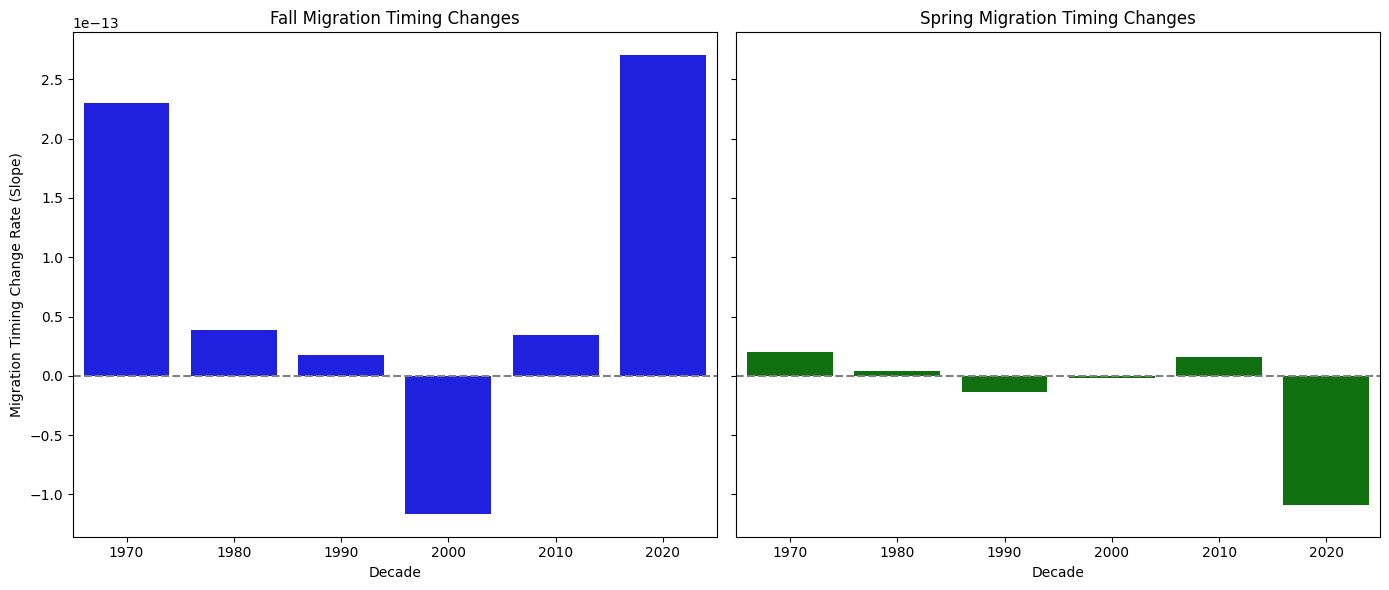

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(data=df_slope[df_slope["Migration_Season"] == "Fall Migration (Southward)"],
            x="Decade", y="Slope", ax=axes[0], color="blue")
axes[0].set_title("Fall Migration Timing Changes")
axes[0].set_ylabel("Migration Timing Change Rate (Slope)")
axes[0].axhline(0, color="gray", linestyle="dashed")

sns.barplot(data=df_slope[df_slope["Migration_Season"] == "Spring Migration (Northward)"],
            x="Decade", y="Slope", ax=axes[1], color="green")
axes[1].set_title("Spring Migration Timing Changes")
axes[1].axhline(0, color="gray", linestyle="dashed")

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

file_path = "/content/drive/My Drive/Colab Notebooks/Updated Milestone 2/final_merged_dataset.parquet"

# Check if the file exists
print("File exists:", os.path.exists(file_path))

File exists: True


In [ ]:
import pandas as pd
import ace_tools as tools  # Tool to display DataFrame in Colab

# Load the Parquet file
df = pd.read_parquet(file_path, engine="fastparquet")  # Use 'pyarrow' if needed

# Display the first few rows for your slide
tools.display_dataframe_to_user(name="Processed Data Snapshot", dataframe=df.head(10))


ModuleNotFoundError: No module named 'ace_tools'